In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [20]:
np.random.seed(17)

mu = 0
std = 0.4

rv = stats.norm(mu,std)

a = 2
b = 0.5

m = 200

def f(x,a,b,rv):
    n = x.size
    z = rv.rvs(size = n)
    y = np.zeros(n)
    y_hat = y.copy()
    y_1 = y.copy()
    y_2 = y.copy()
    for i in range(n):
        y[i] = a*x[i]+b+z[i]
        y_hat[i] = a*x[i]+b
        y_1[i] = a*1.2*x[i]-1.2
        y_2[i] = a*0.9*x[i]+1.1
    return y,y_hat,y_1,y_2


In [41]:
x = np.linspace(0,10,m+1)
y,y_hat,y_1,y_2 = f(x,a,b,rv)

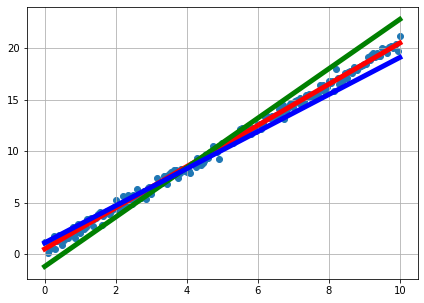

In [42]:
plt.figure(1,figsize = (7,5))
plt.scatter(x,y)
plt.plot(x,y_hat,'r',linewidth = 5)
plt.plot(x,y_1,'g',linewidth = 5)
plt.plot(x,y_2,'b',linewidth = 5)
plt.grid()

In [46]:
X = x
Xnew = sm.add_constant(X) # Xnew.shape = (201,2)
#in each row, Xnew[i]=(1,X(i))
#recall y_hat[i] = beta_0 * 1 + beta_1 * x[i]
model = sm.OLS(y,Xnew).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.574e+04
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          4.01e-237
Time:                        20:07:15   Log-Likelihood:                -92.217
No. Observations:                 201   AIC:                             188.4
Df Residuals:                     199   BIC:                             195.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4759      0.054      8.801      0.000       0.369       0.583
x1             2.0006      0.009    213.866      0.000       1.982       2.019
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.752
Skew:                          -0.107   Prob(JB):                        0.687
Kurtosis:                       2.790   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

df_residuals: n - (m+1) = 201 - 2 = 199  
$stderror^{2}_{\beta_1}$ = $\sqrt{\frac{\hat{\sigma}^2}{n(S_x^2)}}$   

$std error^2_{\beta_0} = \hat{\sigma}^2 (\frac{1}{n}+\frac{\bar{x}^2}{n(S_x^2)})$

$\hat{\sigma}^2 =\frac{\sum_{i=1}^{201}\hat{\epsilon}^2_i}{n-2}$ , while $\hat{\epsilon} = y_i - \hat{y}_i$  

$S_x^2 = \frac{\sum_{i=1}^{201}(x_i-\hat{x}_i)^2}{n}$

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('WeekInt.csv')